In [19]:
from compressed_reconstruct import OCTReconstruction
import matplotlib.gridspec as gridspec
import cv2
from misc import processing
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Init filename and address
file_name = ['ear']
short_axis_length = 20
# Module level constants
eps = 1e-14
lmbda = 1e-1

i = 0

In [3]:
s, D = processing.load_data(file_name[i], decimation_factor=short_axis_length, data_only= False)
l2f, snorm = processing.to_l2_normed(s)

K = snorm.shape[1]  # number of A-line signal
N = snorm.shape[0]  # length of A-line signgal
M = 1  # state of dictionary
print("file name", file_name)

print("number of A-line signal", K)
print("length of A-line signgal", N)
rvmin, vmax = 5, 55  # dB
s_log = 20 * np.log10(abs(s))
s_log = processing.imag2uint(s_log, rvmin, vmax)

(330, 10240)
file name ['ear']
number of A-line signal 512
length of A-line signgal 330


Text(0.5, 0, 'axial depth(pixels)')

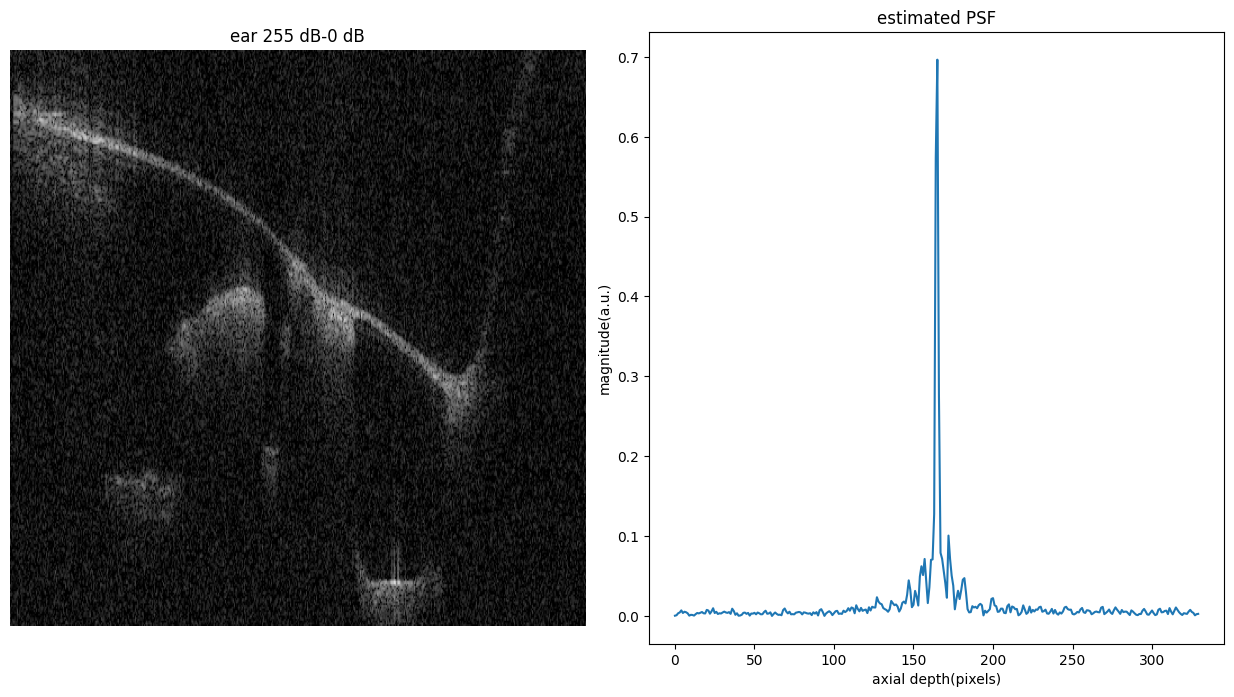

In [4]:
fig = plt.figure(figsize=(18, 13), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)

ax = fig.add_subplot(gs[1, 0])

vmin, vmax = 0,255
ax.set_title(file_name[i]+' %d dB-%d dB' % (vmax, vmin))
ax.imshow(s_log, cmap='gray', vmax=vmax, vmin=vmin)
ax.set_aspect(s_log.shape[1] / s_log.shape[0])
ax.set_axis_off()

ax = fig.add_subplot(gs[1, 1])
ax.set_title('estimated PSF')
ax.plot(abs(D))
ax.set_ylabel('magnitude(a.u.)')
ax.set_xlabel('axial depth(pixels)')

In [20]:
cv2.imwrite('ear.jpg',s_log)

True

In [5]:
speckle_weight = 0.1
lmbda = 0.05
w_lmbda = 0.05
x1, W = processing.make_sparse_representation(s, D, lmbda,w_lmbda, speckle_weight, Mask=True, Ear=True)
x1_log = 20 * np.log10(abs(x1))

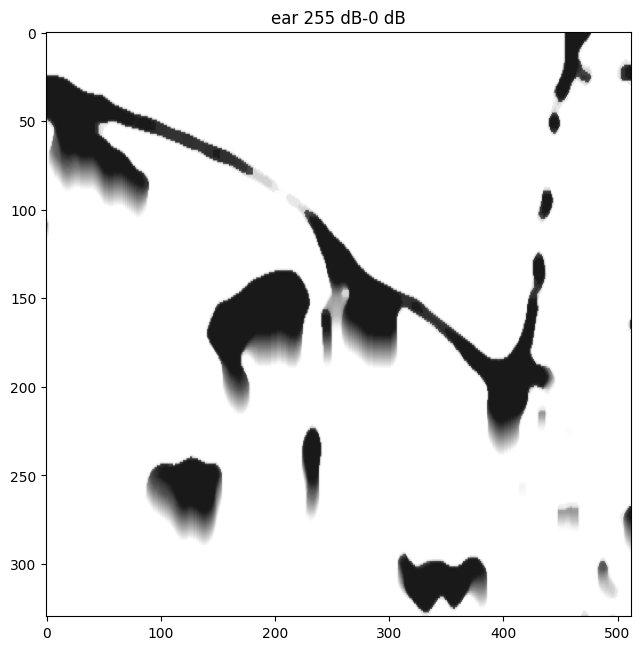

In [6]:
fig = plt.figure(figsize=(18, 13), constrained_layout=True)
gs = gridspec.GridSpec(2, 3, figure=fig)
ax = fig.add_subplot(gs[1, 0])


vmin, vmax = 0,255
ax.set_title(file_name[i]+' %d dB-%d dB' % (vmax, vmin))
ax.imshow(255*W, cmap='gray', vmax=vmax, vmin=vmin)
ax.set_aspect(x1_log.shape[1] / x1_log.shape[0])

plt.show()

In [7]:
print(np.shape(s_log))
print(s_log)
print(np.amax(s_log))


(330, 512)
[[25 42  8 ...  0  5  0]
 [46 18 37 ...  6  0  0]
 [59 39 24 ...  5  0 31]
 ...
 [41  9 35 ... 48  9 23]
 [19 29 26 ... 26  0 36]
 [50 39 24 ...  0  0 37]]
222


In [8]:
# Load the image file
# image_path = '../data/LK2_180.jpg'

# inputImg = plt.imread(image_path)
# inputImg = np.array(inputImg)
inputImg = s_log
print(np.shape(inputImg[1,:]))
# x is horizontal

(512,)


In [9]:
axial_PSF = abs(D)
max_val = np.amax(axial_PSF)
focus_pos = np.argmax(axial_PSF)

# diameter = 14*0.59
diameter = 35*2
recon_size = 32
patch_size = 1
startX = 80
startY = 85
step_size = 2
step_interval = 17 # um
radius = (diameter/2)/(step_interval/step_size) 
z_depth = 0
print(radius)

4.117647058823529


In [10]:
from compressed_reconstruct import OCTReconstruction


In [11]:
recon = OCTReconstruction(recon_size=recon_size,radius=radius,step_size=step_size, z_0=focus_pos, estimated_axial_psf=axial_PSF)


In [21]:
I_rec_norm, I_init_orig =recon.reconstruct_patch_psf_bscan(startX, startY, inputImg, W)

num_row_sensing 12
partial image (12, 12)


d:\anaconda\envs\cdl\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


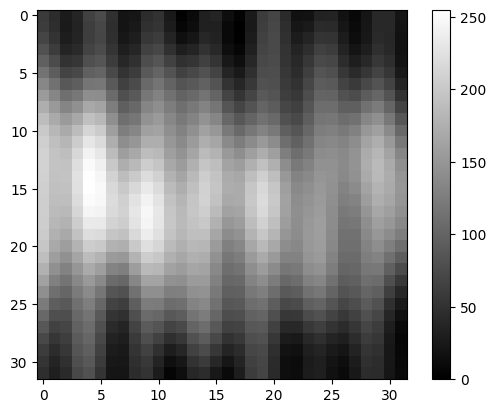

In [22]:
# Plot the array as an image
plt.imshow(I_rec_norm, cmap='gray')
plt.colorbar()  # Add a colorbar for reference
plt.show()

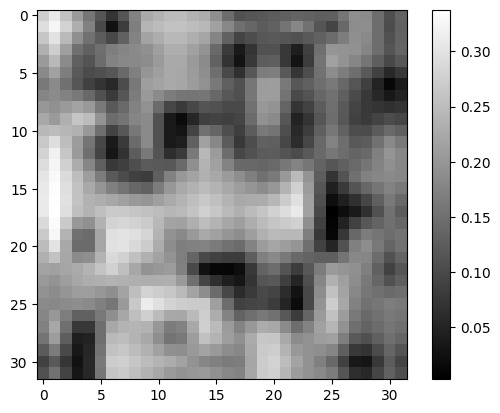

In [14]:
# Plot the array as an image
plt.imshow(I_init_orig, cmap='gray')
plt.colorbar()  # Add a colorbar for reference
plt.show()

In [15]:
import cv2

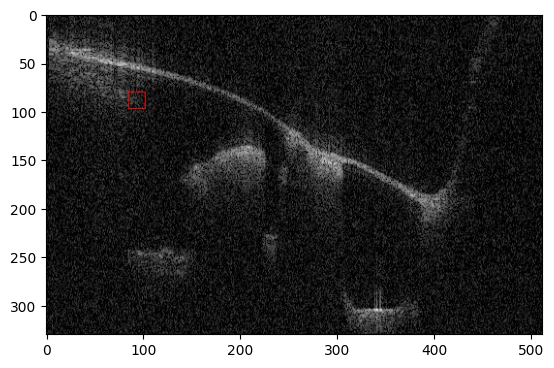

In [16]:
drawImg = cv2.cvtColor(np.array(inputImg), cv2.COLOR_GRAY2BGR)

# Draw a rectangle on the image
cv2.rectangle(drawImg, (startY, startX), (startY +17, startX + 17), (255, 0, 0), 1)
partial_img = drawImg[startX:startX+12, startY:startY+12]
# Display the image with the rectangle
plt.imshow(drawImg)
plt.show()

In [17]:
# # Draw a rectangle on the image
# drawImg = np.array(inputImg)
# cv2.rectangle(drawImg, (startX, startY), (startX + 30, startY + 30), 0, 1)

# # Display the image with the rectangle
# # Plot the array as an image
# plt.imshow(drawImg, cmap='gray')
# plt.colorbar()  # Add a colorbar for reference
# plt.show()


0


C:\Users\zyjia\AppData\Local\Temp\ipykernel_28224\3623506344.py:8: RuntimeWarning: invalid value encountered in divide
  normalized_array = (image_array - min_value) / (max_value - min_value) * 255
C:\Users\zyjia\AppData\Local\Temp\ipykernel_28224\3623506344.py:11: RuntimeWarning: invalid value encountered in cast
  uint8_array = normalized_array.astype('uint8')


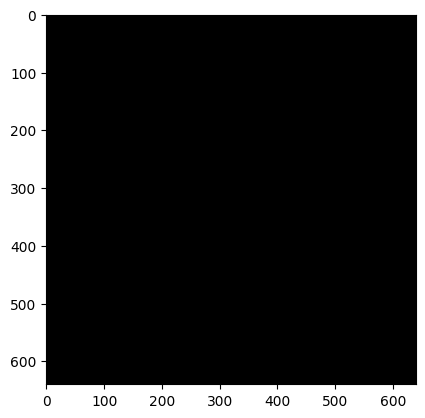

In [18]:
image_array = cv2.imread('output_image.jpg')
# Compute the minimum and maximum values of the array
min_value = np.min(image_array)
max_value = np.max(image_array)
print(max_value)

# Normalize the array and scale it to the range [0, 255]
normalized_array = (image_array - min_value) / (max_value - min_value) * 255

# Convert the normalized array to uint8 data type
uint8_array = normalized_array.astype('uint8')
# Display the image with the rectangle
plt.imshow(uint8_array)
plt.show()